## Preparación
Se descarga el DataSet de [Kaggle](https://www.kaggle.com/datasets/prevek18/ames-housing-dataset?resource=download) y se importan las librerías a utilizar. `Numpy` y `Pandas` para trabajar con vectores y matrices multidimensionales. De `Scikit` importamos `train_test_split` para separar los datos en un set de entrenamiento y otro de prueba para probar el modelo. A su vez, importamos las librerias correspondientes a nuestro modelo de entrenamiento. Para graficar la matriz de correlación importamos `matplotlib` y `seaborn`.
Para leer el dataset descargado como csv que descargamos, se utiliza la función `read_csv()` de la librería `Pandas`:

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# Para evitar los mensajes de advertencia
import warnings
warnings.filterwarnings('ignore')

# Importamos el DataSet previamente descargado
dataset = pd.read_csv('AmesHousing.csv')
# Creamos una copia por seguridad.
df = dataset.copy()

In [2]:
#Se configura el formato de los decimales.
pd.options.display.float_format = '{:20.2f}'.format
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.00,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.00,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Exploración
Se busca reconocer la cantidad de datos faltantes o valores nulos. Para ello, se obtiene la información de cada columna y sus valores estadísticos. Ya entendiendo como funciona nuestro dataset, se obtiene la cantidad de valores faltantes.

In [3]:
print(f'El dataset AmesHousing tiene {df.shape[0]} filas y {df.shape[1]} columnas.')

El dataset AmesHousing tiene 2930 filas y 82 columnas.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [5]:
# Se obtiene la información estadística en nuestro dataset. Queremos saber la media, desviación estándar, mínimo, máximo, y el percentil 50 (mediana) de cada columna numérica.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Order,2930.00,1465.50,845.96,1.00,733.25,1465.50,2197.75,2930.00
PID,2930.00,714464496.99,188730844.65,526301100.00,528477022.50,535453620.00,907181097.50,1007100110.00
MS SubClass,2930.00,57.39,42.64,20.00,20.00,50.00,70.00,190.00
Lot Frontage,2440.00,69.22,23.37,21.00,58.00,68.00,80.00,313.00
Lot Area,2930.00,10147.92,7880.02,1300.00,7440.25,9436.50,11555.25,215245.00
Overall Qual,2930.00,6.09,1.41,1.00,5.00,6.00,7.00,10.00
Overall Cond,2930.00,5.56,1.11,1.00,5.00,5.00,6.00,9.00
Year Built,2930.00,1971.36,30.25,1872.00,1954.00,1973.00,2001.00,2010.00
Year Remod/Add,2930.00,1984.27,20.86,1950.00,1965.00,1993.00,2004.00,2010.00
Mas Vnr Area,2907.00,101.90,179.11,0.00,0.00,0.00,164.00,1600.00


In [6]:
df_missing = df[df.columns[df.isnull().any()].tolist()]
print(f'Hay un total de {df_missing.shape[1]} variables con valores faltantes: \n {df_missing.columns.values}')

Hay un total de 27 variables con valores faltantes: 
 ['Lot Frontage' 'Alley' 'Mas Vnr Type' 'Mas Vnr Area' 'Bsmt Qual'
 'Bsmt Cond' 'Bsmt Exposure' 'BsmtFin Type 1' 'BsmtFin SF 1'
 'BsmtFin Type 2' 'BsmtFin SF 2' 'Bsmt Unf SF' 'Total Bsmt SF'
 'Electrical' 'Bsmt Full Bath' 'Bsmt Half Bath' 'Fireplace Qu'
 'Garage Type' 'Garage Yr Blt' 'Garage Finish' 'Garage Cars' 'Garage Area'
 'Garage Qual' 'Garage Cond' 'Pool QC' 'Fence' 'Misc Feature']


In [7]:
df_objects = df.select_dtypes(include="object")
print(f'Hay un total de {df_objects.shape[1]} variables con objetos no numéricos: \n {df_objects.columns.values}')

Hay un total de 43 variables con objetos no numéricos: 
 ['MS Zoning' 'Street' 'Alley' 'Lot Shape' 'Land Contour' 'Utilities'
 'Lot Config' 'Land Slope' 'Neighborhood' 'Condition 1' 'Condition 2'
 'Bldg Type' 'House Style' 'Roof Style' 'Roof Matl' 'Exterior 1st'
 'Exterior 2nd' 'Mas Vnr Type' 'Exter Qual' 'Exter Cond' 'Foundation'
 'Bsmt Qual' 'Bsmt Cond' 'Bsmt Exposure' 'BsmtFin Type 1' 'BsmtFin Type 2'
 'Heating' 'Heating QC' 'Central Air' 'Electrical' 'Kitchen Qual'
 'Functional' 'Fireplace Qu' 'Garage Type' 'Garage Finish' 'Garage Qual'
 'Garage Cond' 'Paved Drive' 'Pool QC' 'Fence' 'Misc Feature' 'Sale Type'
 'Sale Condition']


In [8]:
# Se obtiene la cantidad de datos faltantes por columna
num_faltante = df.isna().sum()
# Se excluyen las columnas que no tengan ningún dato faltante
num_faltante = num_faltante[num_faltante > 0]
# Se obtienen los porcentajes de los valores faltantes
porcent_faltante = num_faltante * 100 / df.shape[0]

# Se concatenan y se presentan en una tabla en orden descendente
pd.concat([num_faltante, porcent_faltante], axis=1, keys=['Valores Faltantes', 'Porcentaje']).sort_values(by="Valores Faltantes", ascending=False)

,Valores Faltantes,Porcentaje
Pool QC,2917,99.56
Misc Feature,2824,96.38
Alley,2732,93.24
Fence,2358,80.48
Fireplace Qu,1422,48.53
Lot Frontage,490,16.72
Garage Cond,159,5.43
Garage Qual,159,5.43
Garage Finish,159,5.43
Garage Yr Blt,159,5.43


<Axes: >

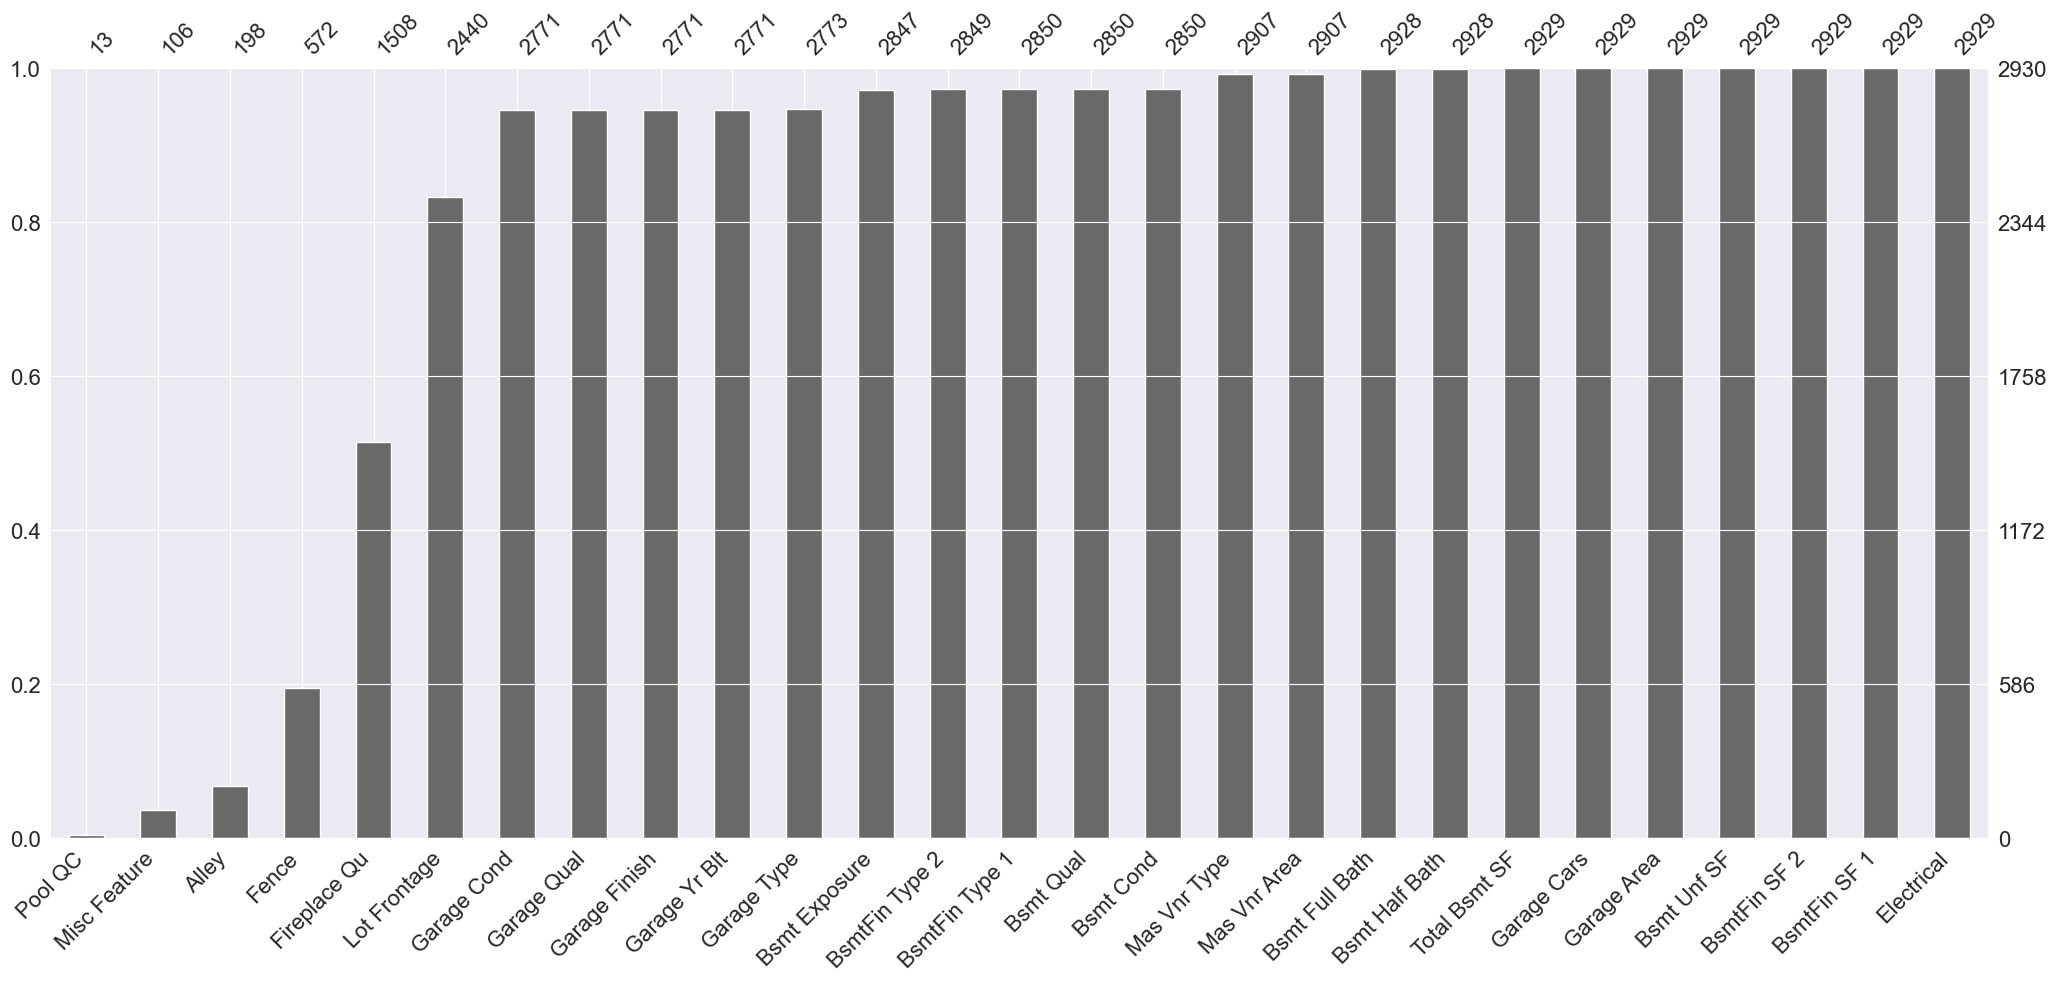

In [9]:
# Para contraponer, visualizamos los valores existentes en orden ascendente
msno.bar(df_missing, sort='ascending')

## Procesamiento
Se prepararán los datos para aplicar al modelo

In [10]:
# Se eliminan las variables que no sean numéricas
df = df.select_dtypes(exclude=['object'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Overall Qual     2930 non-null   int64  
 6   Overall Cond     2930 non-null   int64  
 7   Year Built       2930 non-null   int64  
 8   Year Remod/Add   2930 non-null   int64  
 9   Mas Vnr Area     2907 non-null   float64
 10  BsmtFin SF 1     2929 non-null   float64
 11  BsmtFin SF 2     2929 non-null   float64
 12  Bsmt Unf SF      2929 non-null   float64
 13  Total Bsmt SF    2929 non-null   float64
 14  1st Flr SF       2930 non-null   int64  
 15  2nd Flr SF       2930 non-null   int64  
 16  Low Qual Fin SF  2930 non-null   int64  
 17  Gr Liv Area   

In [12]:
num_faltante = df.isna().sum()
num_faltante = num_faltante[num_faltante > 0]
porcent_faltante = num_faltante * 100 / df.shape[0]
pd.concat([num_faltante, porcent_faltante], axis=1, keys=['Valores Faltantes', 'Porcentaje']).sort_values(by="Valores Faltantes", ascending=False)

,Valores Faltantes,Porcentaje
Lot Frontage,490,16.72
Garage Yr Blt,159,5.43
Mas Vnr Area,23,0.78
Bsmt Full Bath,2,0.07
Bsmt Half Bath,2,0.07
BsmtFin SF 1,1,0.03
BsmtFin SF 2,1,0.03
Bsmt Unf SF,1,0.03
Total Bsmt SF,1,0.03
Garage Cars,1,0.03


In [13]:
# Se crea una función que elimina los valores nulos y NaN en un DataFrame
def eliminar_valores_nulos(df):
    df_limpio = df.dropna()
    # Eliminar columnas que contienen todos los valores NaN
    df_limpio = df_limpio.dropna(axis=1, how='all')
    return df_limpio

In [14]:
# Se ejecuta la función y se eliminan los valores nulos y NaN.
df_limpio = eliminar_valores_nulos(df)

df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2274 entries, 0 to 2929
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2274 non-null   int64  
 1   PID              2274 non-null   int64  
 2   MS SubClass      2274 non-null   int64  
 3   Lot Frontage     2274 non-null   float64
 4   Lot Area         2274 non-null   int64  
 5   Overall Qual     2274 non-null   int64  
 6   Overall Cond     2274 non-null   int64  
 7   Year Built       2274 non-null   int64  
 8   Year Remod/Add   2274 non-null   int64  
 9   Mas Vnr Area     2274 non-null   float64
 10  BsmtFin SF 1     2274 non-null   float64
 11  BsmtFin SF 2     2274 non-null   float64
 12  Bsmt Unf SF      2274 non-null   float64
 13  Total Bsmt SF    2274 non-null   float64
 14  1st Flr SF       2274 non-null   int64  
 15  2nd Flr SF       2274 non-null   int64  
 16  Low Qual Fin SF  2274 non-null   int64  
 17  Gr Liv Area   

In [15]:
df_limpio.isna().values.sum()

0

In [16]:
# Eliminamos columnas que no serán importantes para nuestro análisis
df_limpio.drop(['Order', 'PID'], axis=1, inplace=True)

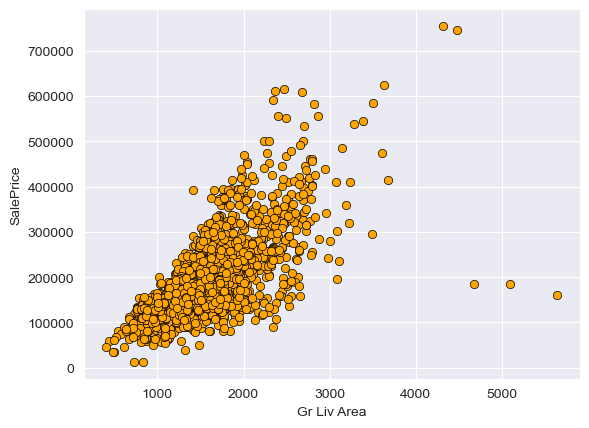

In [17]:
# Se buscan outliers
plt.scatter(x=df_limpio['Gr Liv Area'], y=df_limpio['SalePrice'],
            color="orange", edgecolors="#000000", linewidths=0.5)
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice");

In [18]:
outlier_columns = ["Gr Liv Area"] + \
                  [col for col in dataset.columns if "Sale" in col]
dataset[dataset["Gr Liv Area"] > 4000][outlier_columns]

,Gr Liv Area,Sale Type,Sale Condition,SalePrice
1498,5642,New,Partial,160000
1760,4476,WD,Abnorml,745000
1767,4316,WD,Normal,755000
2180,5095,New,Partial,183850
2181,4676,New,Partial,184750


In [19]:
# Se eliminan los outliers
df_limpio = df_limpio[df_limpio["Gr Liv Area"] < 4000]

## Correlación
Se creará una matriz de correlación entre todas las variables para ver como se correlacionan entre ellas y como nuestras variables de predicción se correlacionan con nuestra variable target. Para ello, buscaremos aquellas con una correlación superior al 60% (0.6)

In [20]:
# A través del método pearson creamos nuestra matriz.
matriz = df_limpio.corr(method='pearson')
matriz

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
MS SubClass,1.00,-0.44,-0.26,0.05,-0.08,0.05,0.03,0.01,-0.06,-0.06,...,-0.02,-0.01,-0.03,-0.03,-0.05,-0.01,-0.04,-0.00,-0.02,-0.08
Lot Frontage,-0.44,1.00,0.46,0.19,-0.06,0.10,0.08,0.20,0.16,0.05,...,0.11,0.15,0.02,0.03,0.08,0.11,0.02,0.02,-0.01,0.35
Lot Area,-0.26,0.46,1.00,0.12,-0.06,0.04,0.04,0.11,0.16,0.10,...,0.14,0.09,0.02,0.01,0.09,0.09,0.03,0.02,-0.02,0.32
Overall Qual,0.05,0.19,0.12,1.00,-0.16,0.61,0.58,0.44,0.27,-0.06,...,0.26,0.31,-0.16,0.00,0.03,0.00,-0.03,0.03,-0.01,0.81
Overall Cond,-0.08,-0.06,-0.06,-0.16,1.00,-0.43,-0.00,-0.17,-0.08,0.05,...,-0.01,-0.10,0.09,0.01,0.05,-0.03,0.03,-0.01,0.03,-0.17
Year Built,0.05,0.10,0.04,0.61,-0.43,1.00,0.63,0.33,0.27,-0.04,...,0.23,0.23,-0.38,0.02,-0.05,-0.01,-0.03,0.01,0.00,0.57
Year Remod/Add,0.03,0.08,0.04,0.58,-0.00,0.63,1.00,0.21,0.14,-0.06,...,0.23,0.27,-0.23,0.02,-0.05,-0.02,-0.03,0.03,0.04,0.55
Mas Vnr Area,0.01,0.20,0.11,0.44,-0.17,0.33,0.21,1.00,0.30,-0.04,...,0.17,0.12,-0.13,0.01,0.07,-0.01,-0.02,0.01,-0.02,0.53
BsmtFin SF 1,-0.06,0.16,0.16,0.27,-0.08,0.27,0.14,0.30,1.00,-0.05,...,0.21,0.10,-0.11,0.04,0.09,0.03,0.03,0.01,0.03,0.45
BsmtFin SF 2,-0.06,0.05,0.10,-0.06,0.05,-0.04,-0.06,-0.04,-0.05,1.00,...,0.09,-0.01,0.02,-0.03,0.05,0.07,-0.00,-0.01,0.02,-0.02


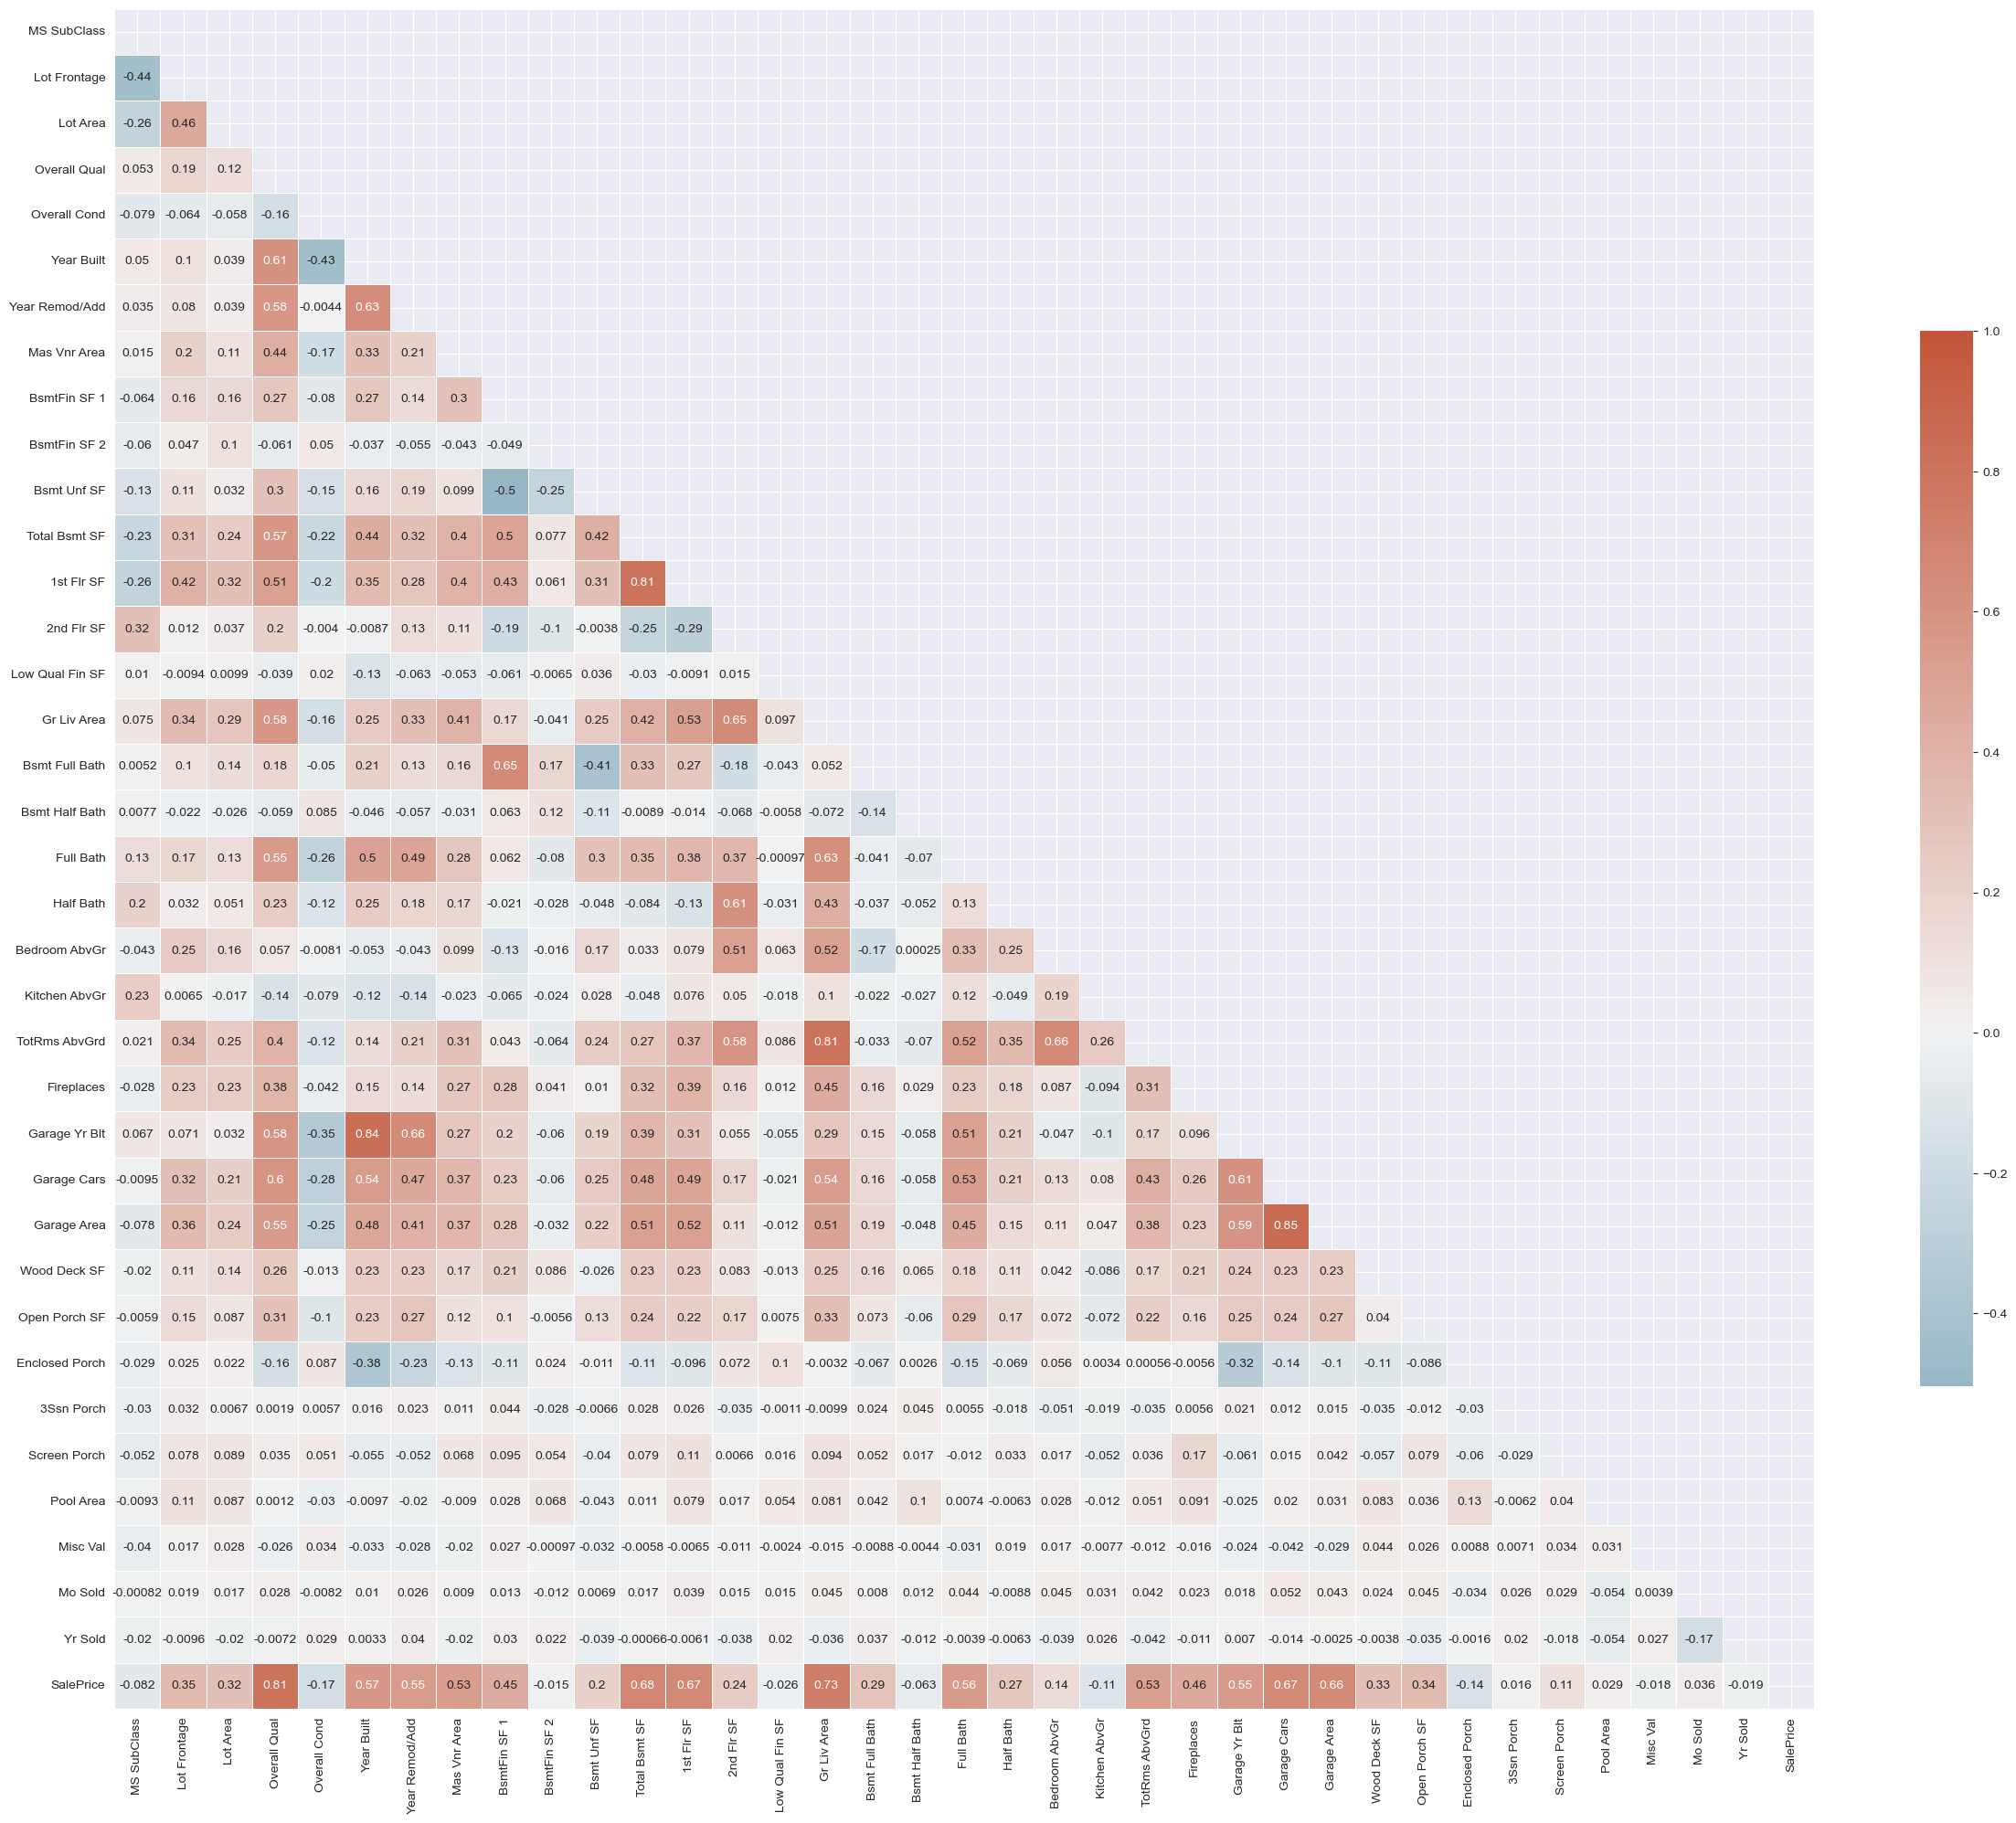

In [21]:
# Para ver la matriz más claramente, generamos una gráfica.
f, ax = plt.subplots(figsize=(30, 30))
mat = df_limpio.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [22]:
# Filtramos la correlación por sobre el 60% que presenten las otras variables con nuestra variable target ('SalePrice')
matriz_f = matriz[matriz['SalePrice'] > 0.6]
matriz_f['SalePrice'].sort_values(ascending=False)

SalePrice                       1.00
Overall Qual                    0.81
Gr Liv Area                     0.73
Total Bsmt SF                   0.68
1st Flr SF                      0.67
Garage Cars                     0.67
Garage Area                     0.66
Name: SalePrice, dtype: float64

In [23]:
# Creamos un DataFrame con todas las columnas que cumplen nuestro criterio de correlación sobre 60%
df_top = pd.DataFrame(data=df_limpio, columns=['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF'])

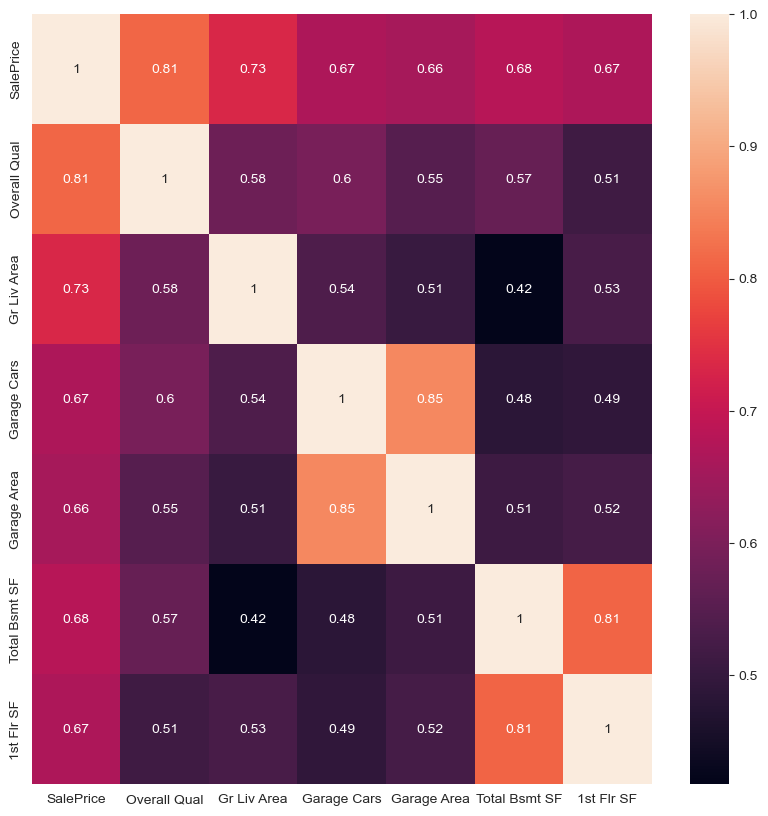

In [24]:
# Graficamos nuestra matriz filtrada.
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_top.corr(), ax=ax, annot=True);

In [25]:
# Eliminamos la variable Garage Cars ya que está altamente correlacionada con Garage Area.
df_top.drop('Garage Cars', axis=1, inplace=True)

In [26]:
df_top

,SalePrice,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF
0,215000,6,1656,528.00,1080.00,1656
1,105000,5,896,730.00,882.00,896
2,172000,6,1329,312.00,1329.00,1329
3,244000,7,2110,522.00,2110.00,2110
4,189900,5,1629,482.00,928.00,928
...,...,...,...,...,...,...
2923,160000,5,1126,484.00,1126.00,1126
2924,131000,5,1224,576.00,1224.00,1224
2925,142500,6,1003,588.00,1003.00,1003
2928,170000,5,1389,418.00,1389.00,1389


### Regresión Lineal

In [27]:
# Necesitamos escalar antes de hacer la transformación
scaler = StandardScaler()
df_top.loc[:, df_top.columns != 'SalePrice'] = scaler.fit_transform(df_top.loc[:, df_top.columns != 'SalePrice'])

In [28]:
# Dividimos en set de entrenamiento y de prueba. Conjunto de pruebas equivalente al 20 % de los datos
X_train, X_test, y_train, y_test = train_test_split(df_top.drop('SalePrice', axis=1), df_top[['SalePrice']], test_size=0.2, random_state=42)

print('Cantidad de datos para train: ', len(X_train))
print('Cantidad de datos para test: ', len(X_test))

Cantidad de datos para train:  1815
Cantidad de datos para test:  454


In [29]:
# La figura de train
X_train.shape

(1815, 5)

In [30]:
# La figura de shape
X_test.shape

(454, 5)

In [31]:
# Ajuste del modelo de regresión lineal
modelo = LinearRegression().fit(X_train, y_train)

In [32]:
# Predicción de valores en el conjunto de prueba
y_pred = modelo.predict(X_test)

In [33]:
# Cálculo del error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 1036872522.9056956


In [34]:
# Creamos una variable de predicción y de valores esperados
prediccion = y_pred
esperados = y_test

In [35]:
print(f'los valores predichos son: {prediccion}')

los valores predichos son: [[168847.8694564 ]
 [188843.09778124]
 [ 89187.06558075]
 [119281.90603191]
 [224508.50104055]
 [136331.2749989 ]
 [ 97045.04701468]
 [118579.77278282]
 [ 49443.05390521]
 [269294.07735393]
 [-21622.88288385]
 [197931.21305512]
 [229625.84305029]
 [198081.88735552]
 [241442.71564613]
 [ 86828.59464578]
 [133936.25621065]
 [185115.30930924]
 [ 97008.18885254]
 [260806.78880653]
 [189958.15369863]
 [111235.92601745]
 [213864.60961036]
 [232476.62427225]
 [162142.00950935]
 [129242.31390233]
 [104054.63480721]
 [177870.82258162]
 [263239.66191439]
 [ 36857.74058855]
 [117107.09785253]
 [192670.95709073]
 [ 77574.39822294]
 [239828.485557  ]
 [259138.75647831]
 [ 67829.29349184]
 [219254.06358398]
 [123481.80379672]
 [ 98728.85694026]
 [172973.50363554]
 [165663.2755682 ]
 [156730.67188254]
 [216240.4539413 ]
 [257664.86102711]
 [147062.55652599]
 [205695.88566095]
 [379340.47253466]
 [164364.09825553]
 [161565.16784908]
 [133801.76932088]
 [129475.03557813]
 [18

In [36]:
print(f'los valores esperados son: {esperados}')

los valores esperados son:       SalePrice
240      186000
1717     200000
2051     118500
1962     135000
870      203000
...         ...
2780     205000
2020     102000
1136     155000
2757     233555
8        236500

[454 rows x 1 columns]


### Visualización de los precios esperados vs los predecidos

In [37]:
df = pd.DataFrame()

In [38]:
df['Esperados'] = esperados

In [39]:
df['Predicción'] = prediccion

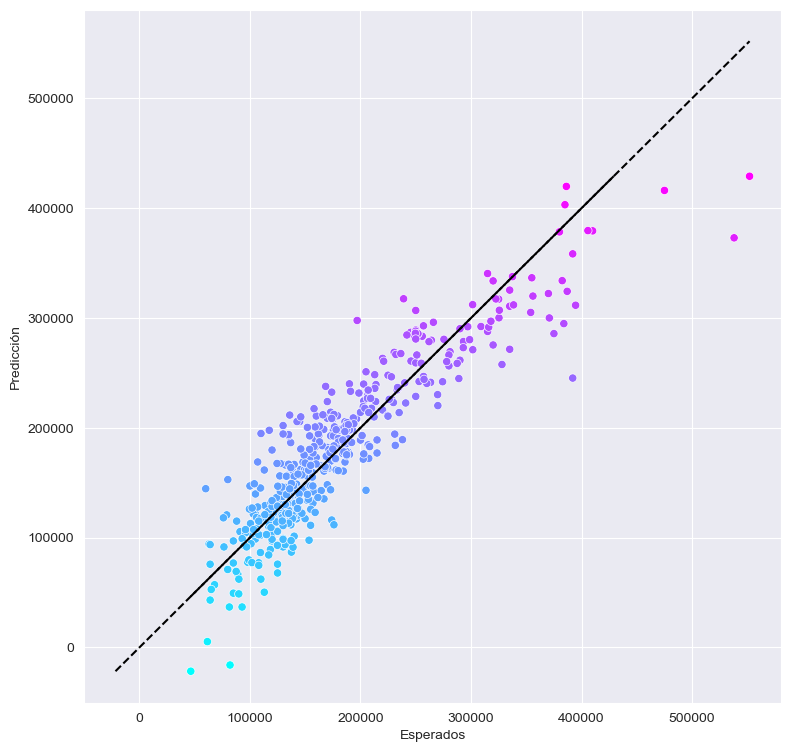

In [40]:
figura = plt.figure(figsize=(9,9))

axes = sns.scatterplot(data=df, x='Esperados', y='Predicción', hue='Predicción', palette='cool', legend=False)

start = (esperados.min(), prediccion.min())
end = (esperados.max(), prediccion.max())

line = plt.plot([start,end],[start,end],'k--')